## Сборный проект — 2: HR-аналитика: Прогнозирование оттока сотрудников

### Описание проекта:

В рамках данного проекта была решена задача прогнозирования оттока сотрудников для компании. Это важная задача для HR-анализа, так как позволяет заранее выявить потенциальных "уязвимых" сотрудников и принять меры для их удержания, что может снизить затраты на рекрутинг и улучшить корпоративную атмосферу. Анализ данных о сотрудниках помогает не только снизить текучесть кадров, но и оптимизировать внутренние процессы и улучшить управление персоналом.

### Задачи:

Построить модель, которая будет предсказывать, покинет ли сотрудник компанию в будущем. Модель должна использовать данные о характеристиках сотрудников, таких как возраст, зарплата, рабочий стаж, отдел, степень удовлетворённости и другие факторы.

### Цели:

1) Изучить и проанализировать данные о сотрудниках.

2) Применить методы машинного обучения для предсказания вероятности оттока сотрудников.

3) Оценить эффективность различных моделей и выбрать лучшую для решения задачи.

4) Сделать выводы о факторах, влияющих на решение сотрудников покинуть компанию.

### 1.4 Методы и инструменты:

Методы машинного обучения: Логистическая регрессия, Random Forest, CatBoost.

Метрики для оценки модели: Accuracy, Precision, Recall, F1-score.

Инструменты: Python, Pandas, Scikit-learn, Matplotlib, Seaborn.

### Описание данных:

id — уникальный идентификатор сотрудника;

dept — отдел, в котором работает сотрудник;

level — уровень занимаемой должности;

workload — уровень загруженности сотрудника;

employment_years — длительность работы в компании (в годах);

last_year_promo — показывает, было ли повышение за последний год;

last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;

supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;

salary — ежемесячная зарплата сотрудника;

job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

## Задача 1  предсказание уровня удовлетворённости сотрудника

### Загрузка данных 

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import pylab

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
data = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


на первый взгляд всё в порядке, посмотрим подробнее во время предобработки

### Предобработка данных

#### Предобработка data

проверим нули

In [7]:
data.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [8]:
data = data.fillna(data.mode().iloc[0])

In [9]:
data.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

проверим типы данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


всё в порядке

проверим дубликаты

In [11]:
data.duplicated().sum()

0

In [12]:
lst = data.select_dtypes(exclude = np.number).columns

for i in lst:
    print(data[i].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing']
['junior' 'middle' 'sinior']
['medium' 'high' 'low']
['no' 'yes']
['no' 'yes']


никаких дубликатов нет

#### предобработка тестовых данных

In [13]:
X_test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [14]:
X_test = X_test.fillna(X_test.mode().iloc[0])

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   2000 non-null   object
 2   level                  2000 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [16]:
X_test.duplicated().sum()

0

In [17]:
lst = X_test.select_dtypes(exclude = np.number).columns

for i in lst:
    print(X_test[i].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' ' ']
['junior' 'middle' 'sinior']
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']


In [18]:
X_test = X_test[X_test['dept'] != ' ']
X_test = X_test[X_test['workload'] != ' ']

In [19]:
y_test.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [20]:
test = X_test.merge(y_test, on = 'id').drop('id', axis = 1)

In [21]:
test

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,0.79
1,hr,junior,medium,1,no,no,4,30000,0.72
2,sales,middle,low,5,no,no,4,19200,0.64
3,sales,middle,low,6,no,no,4,19200,0.60
4,hr,middle,medium,5,no,no,5,40800,0.75
...,...,...,...,...,...,...,...,...,...
1993,marketing,junior,low,3,no,no,3,20400,0.56
1994,technology,middle,low,3,no,no,2,21600,0.14
1995,technology,junior,low,1,no,no,3,14400,0.11
1996,technology,middle,low,8,no,no,1,32400,0.43


In [22]:
X_test = test.drop(['job_satisfaction_rate'], axis = 1)
y_test = test['job_satisfaction_rate']

### Исследовательский анализ данных

In [23]:
data

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [24]:
def bar(col):
    plt.figure(figsize = (20,9))
    sns.barplot(x = col.value_counts().index, y = col.value_counts())
    plt.show()
    
def hst(col):
    plt.figure(figsize = (20,9))
    sns.histplot(x = col)
    plt.show()

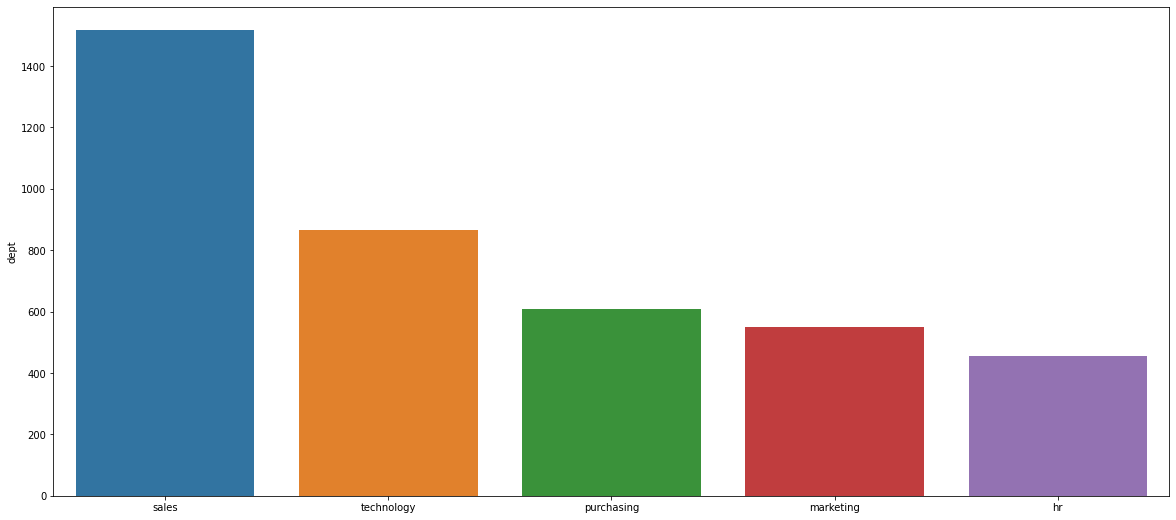

In [25]:
bar(data['dept'])

больше всего сотрудников работает в отделе sales

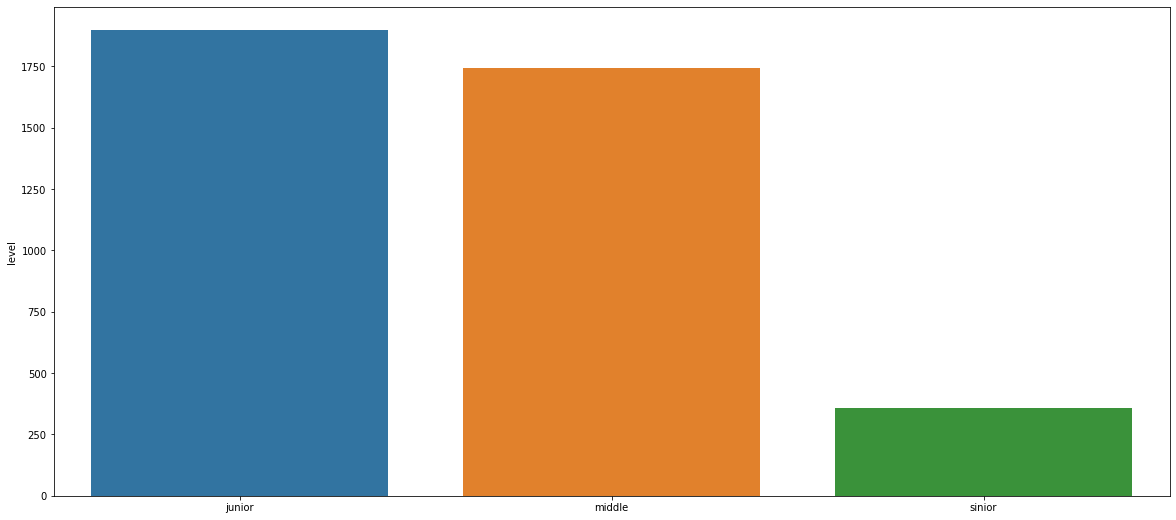

In [26]:
bar(data['level'])

меньше всего в компании sinior сотрудников 

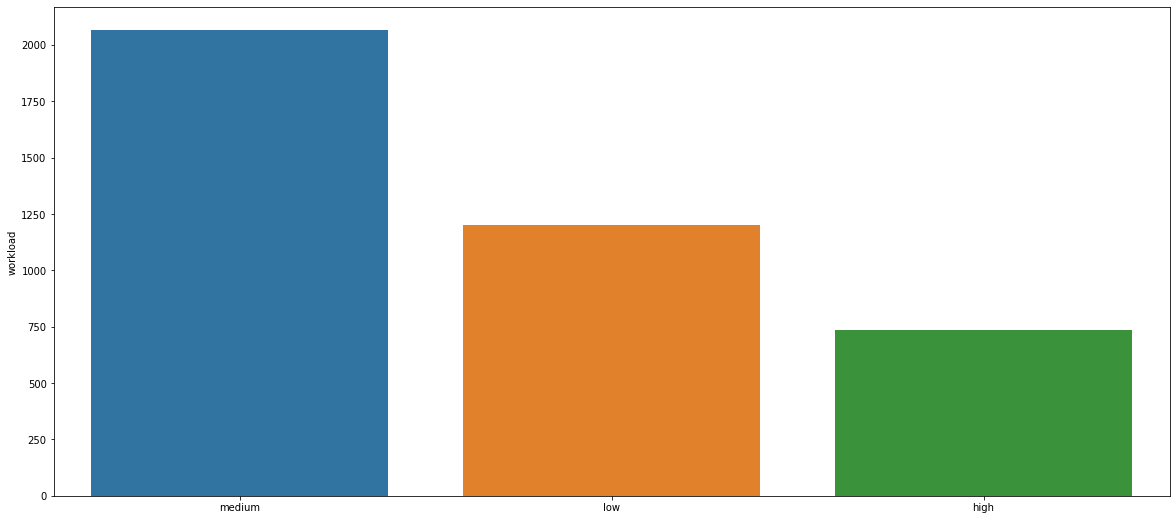

In [27]:
bar(data['workload'])

больше всего сотрудников имеют среднюю загруженность

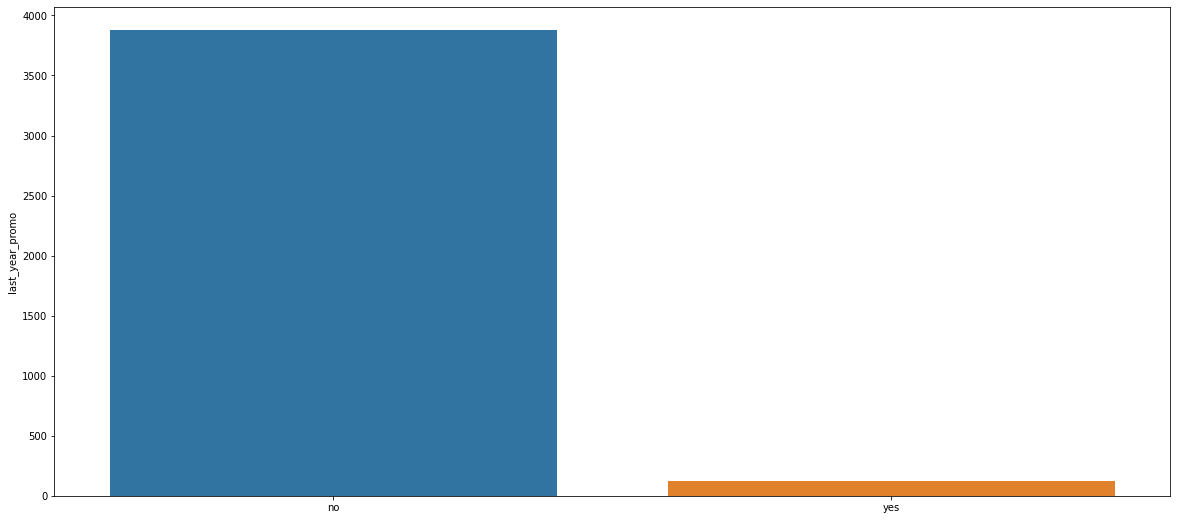

In [28]:
bar(data['last_year_promo'])

In [29]:
data['last_year_promo'].value_counts()

no     3880
yes     120
Name: last_year_promo, dtype: int64

всего в компании было 120 повышений за последний год

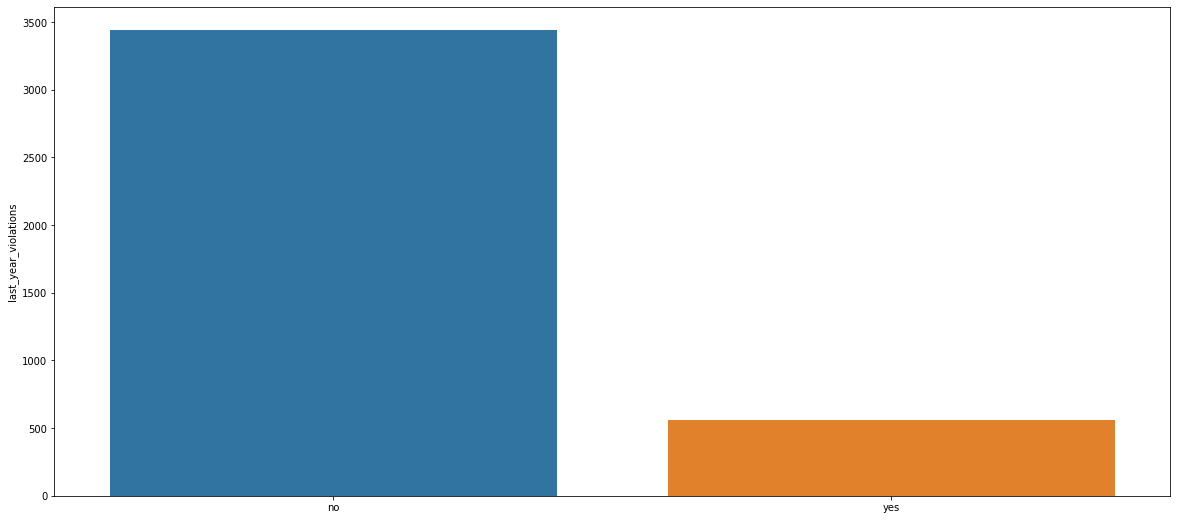

In [30]:
bar(data['last_year_violations'])

In [31]:
data['last_year_violations'].value_counts()

no     3441
yes     559
Name: last_year_violations, dtype: int64

трудовой договор нарушили целых 559 сотрудников

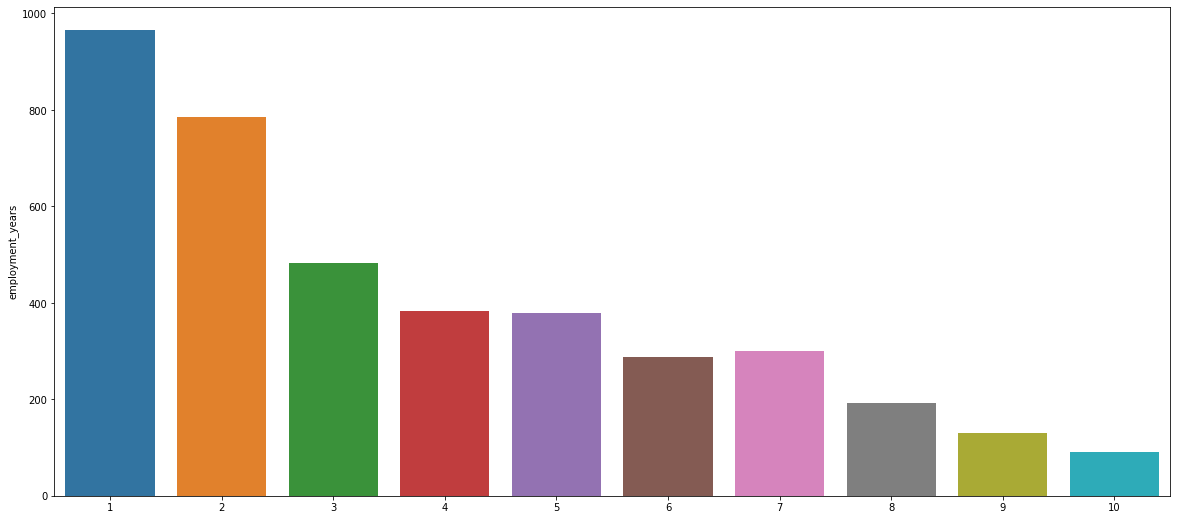

In [32]:
bar(data['employment_years'])

чем больше стаж сотрудников тем их меньше

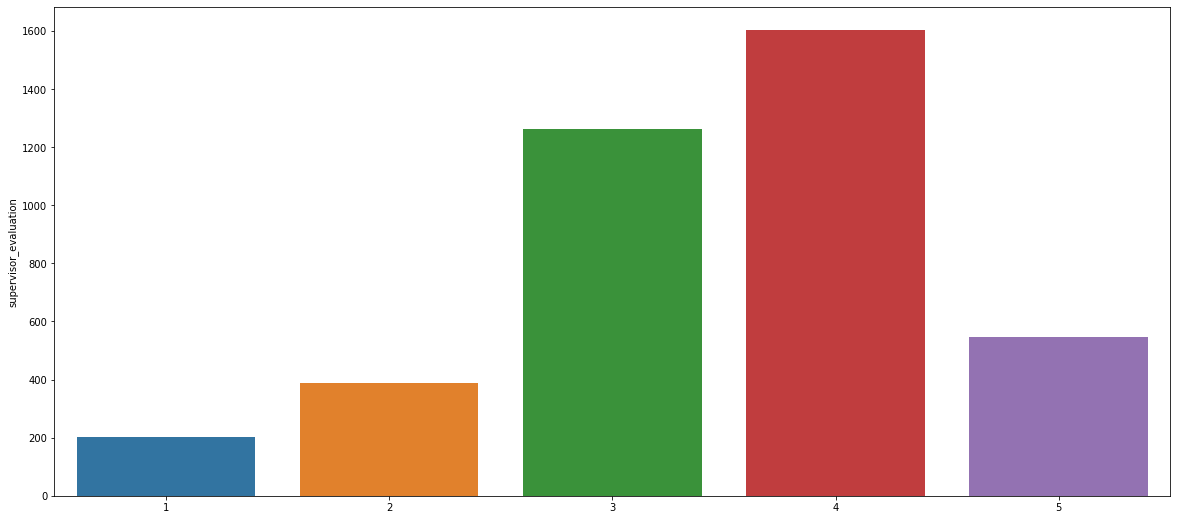

In [33]:
bar(data['supervisor_evaluation'])

у большенства сотрудников оценка труда - 4

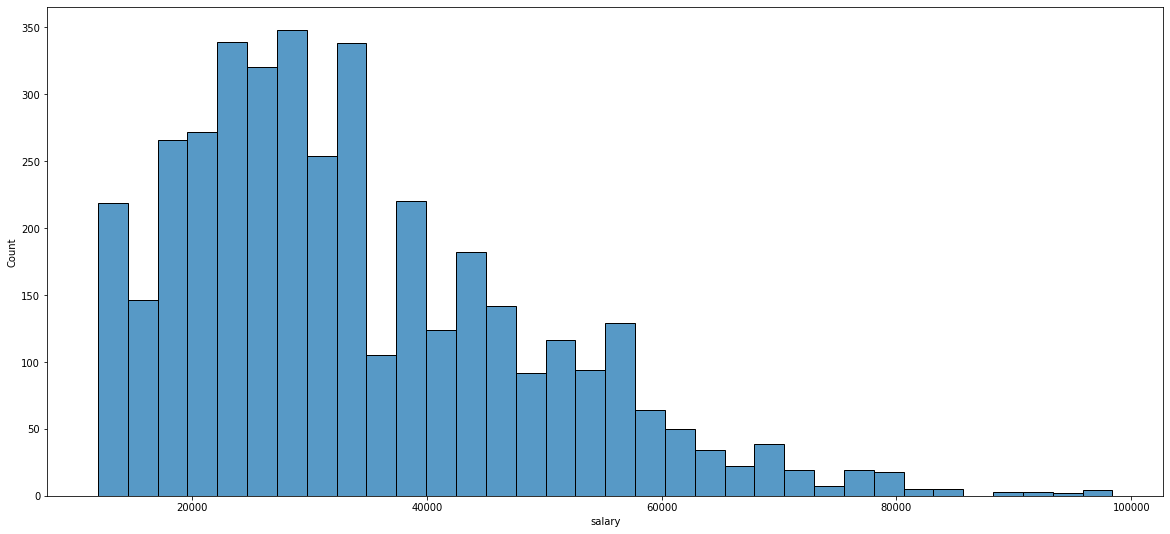

In [34]:
hst(data['salary'])

зарплата в среднем составляем 20000 - 40000

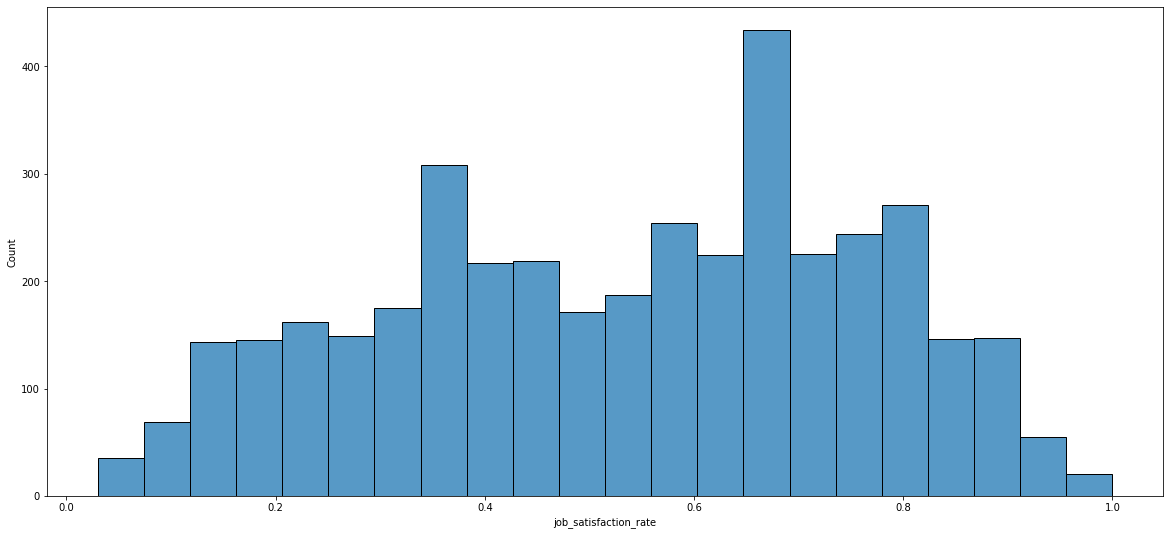

In [35]:
hst(data['job_satisfaction_rate'])

оценки удовлетворенности работой распределяются практически равномерно с 0.1 до 0.9, но также есть и преблодающие значения такие как: ~3.9 и 0.7

посмотрим как выглядят тренировочные данные относительно тестовых

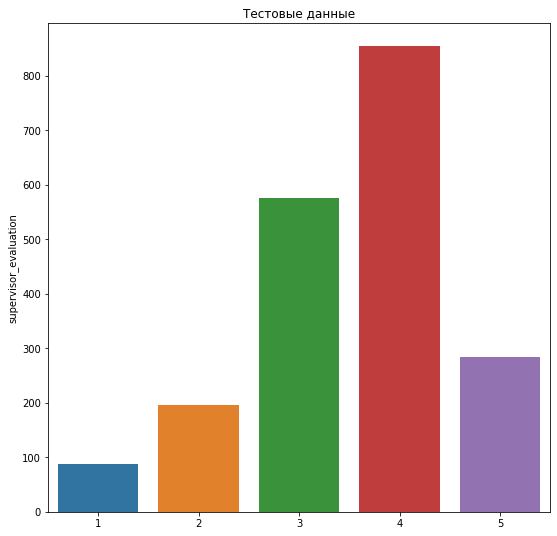

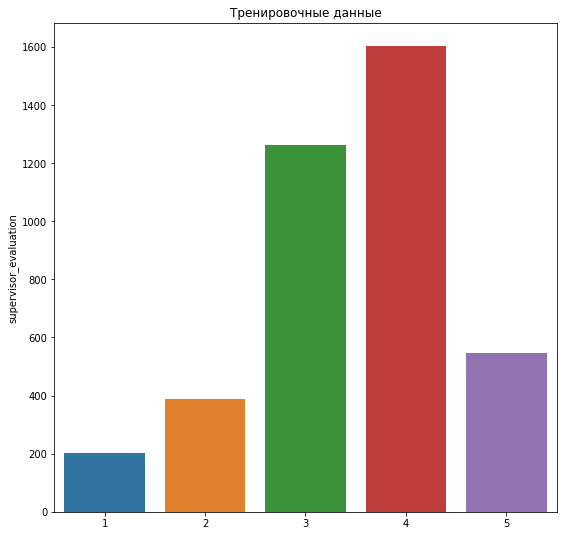

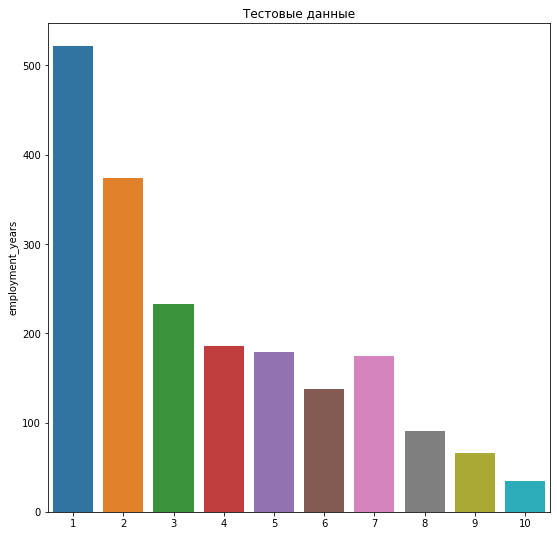

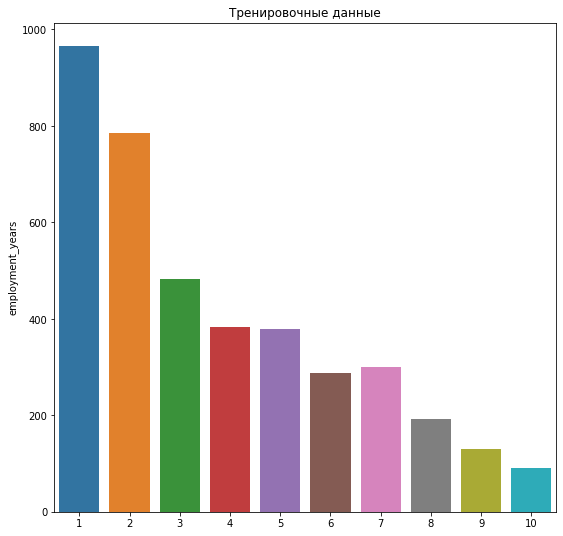

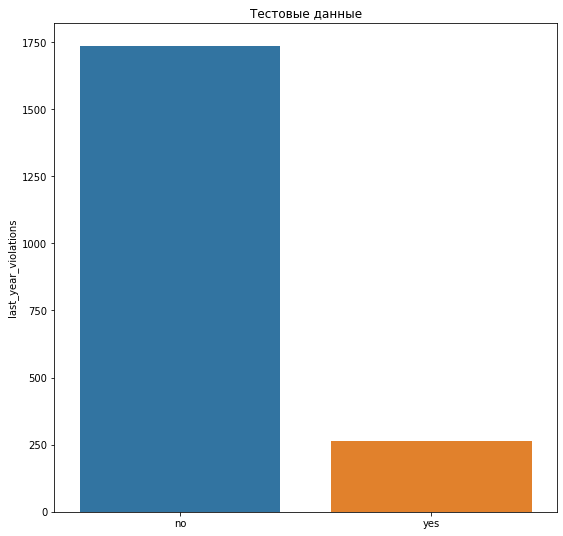

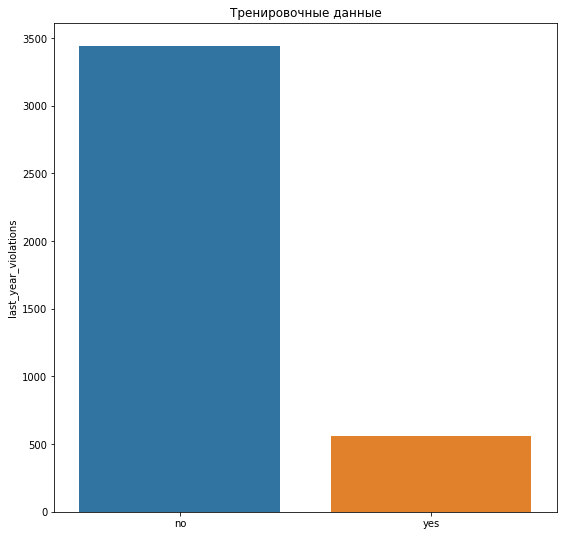

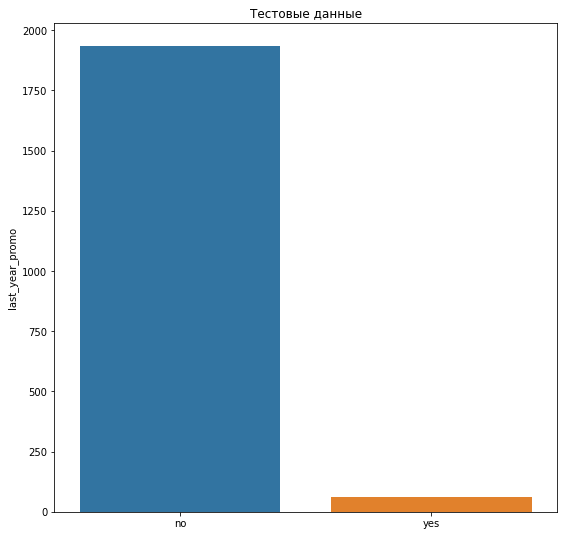

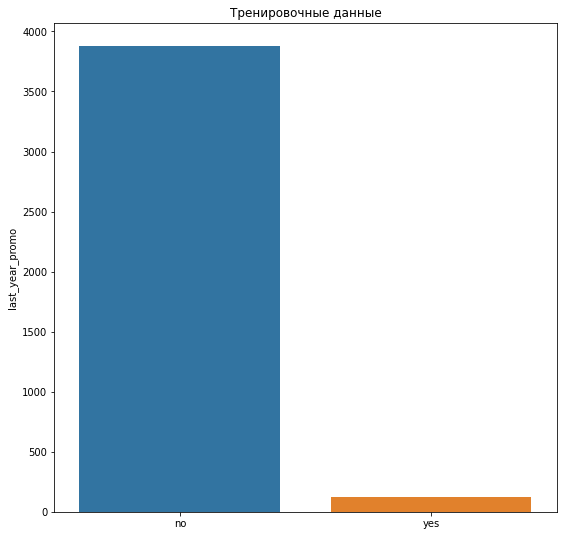

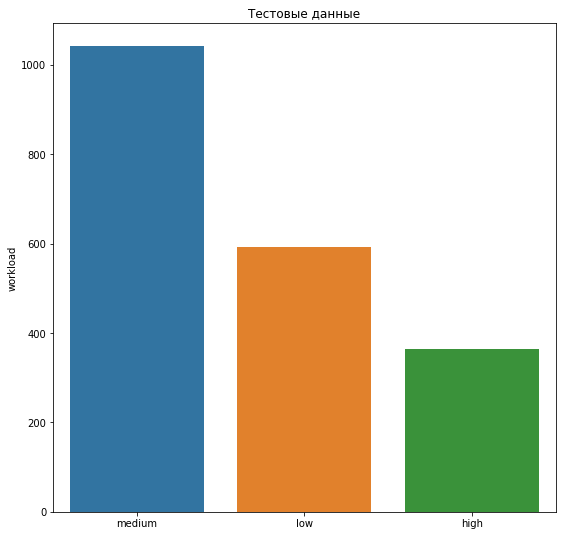

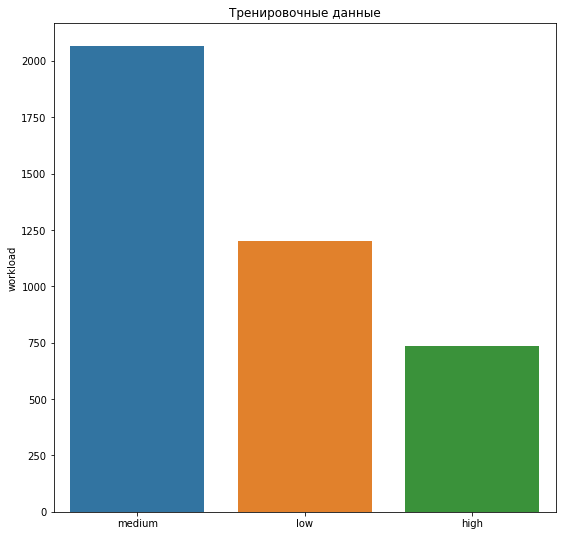

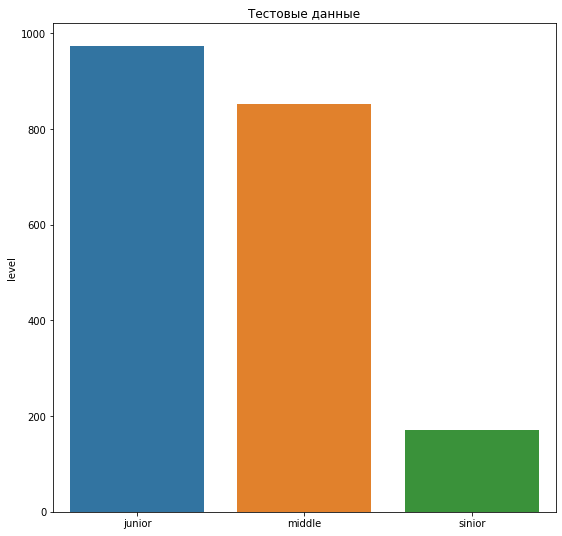

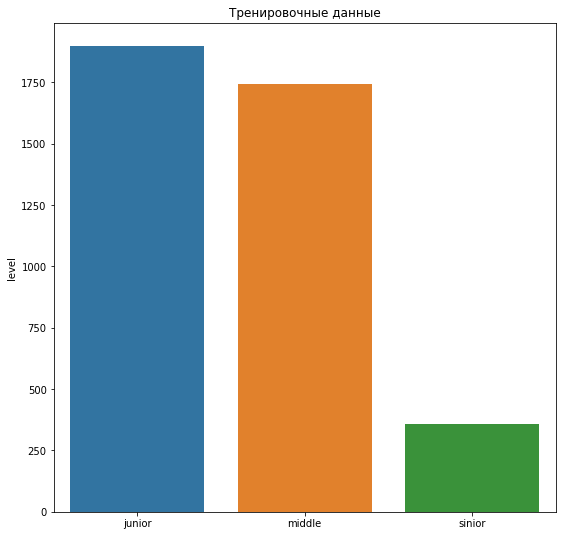

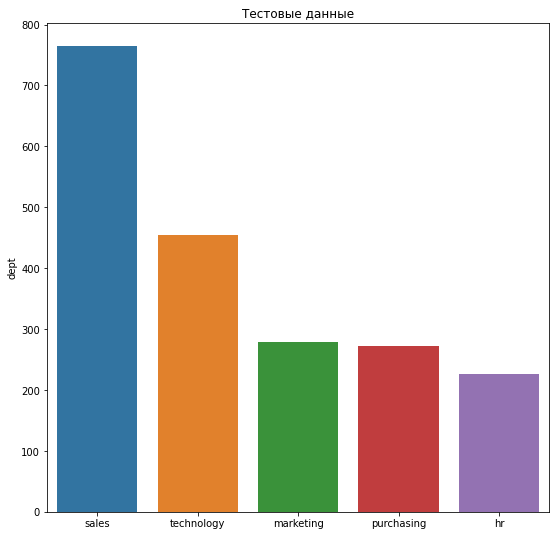

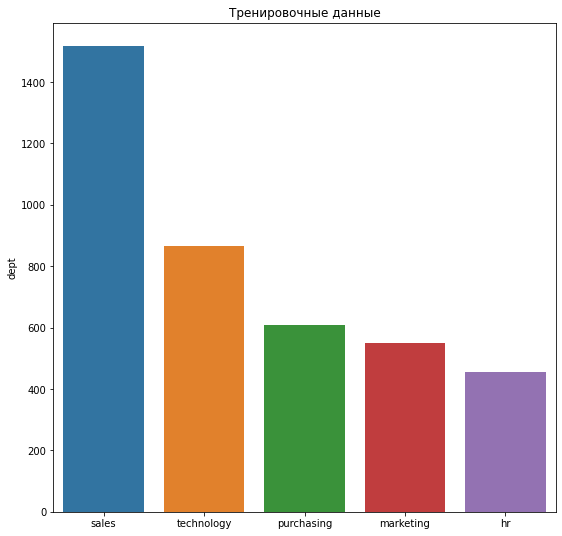

In [36]:
lst_b = ['supervisor_evaluation', 'employment_years', 'last_year_violations', 'last_year_promo', 'workload', 'level', 'dept']
lst_hist = ['job_satisfaction_rate', 'salary']

for i in  lst_b:
    plt.figure(figsize = (9,9))
    sns.barplot(x = X_test[i].value_counts().index, y = X_test[i].value_counts()).set_title("Тестовые данные")
    plt.show()
    plt.figure(figsize = (9,9))
    sns.barplot(x = data[i].value_counts().index, y = data[i].value_counts()).set_title("Тренировочные данные")
    plt.show()
#подскажите пожалуйста как можно это грамотно либо объеденить в один график либо сделать как то чтобы графики были два одну строку

все данные распределены одинаково 

Вывод:

у сотрудников в среднем маленькие зарплаты, но скорее всего это связано с тем, что в компании много новых сотрудников, также совсем немного повышений за год и оценки работников на счет своей работы оставляют желать лучшего, так как много людей имеют оценку ниже 0.5

### Подготовка данных к обучению

проведем корреляционный и проверим нет ли мультиколлинеарности

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


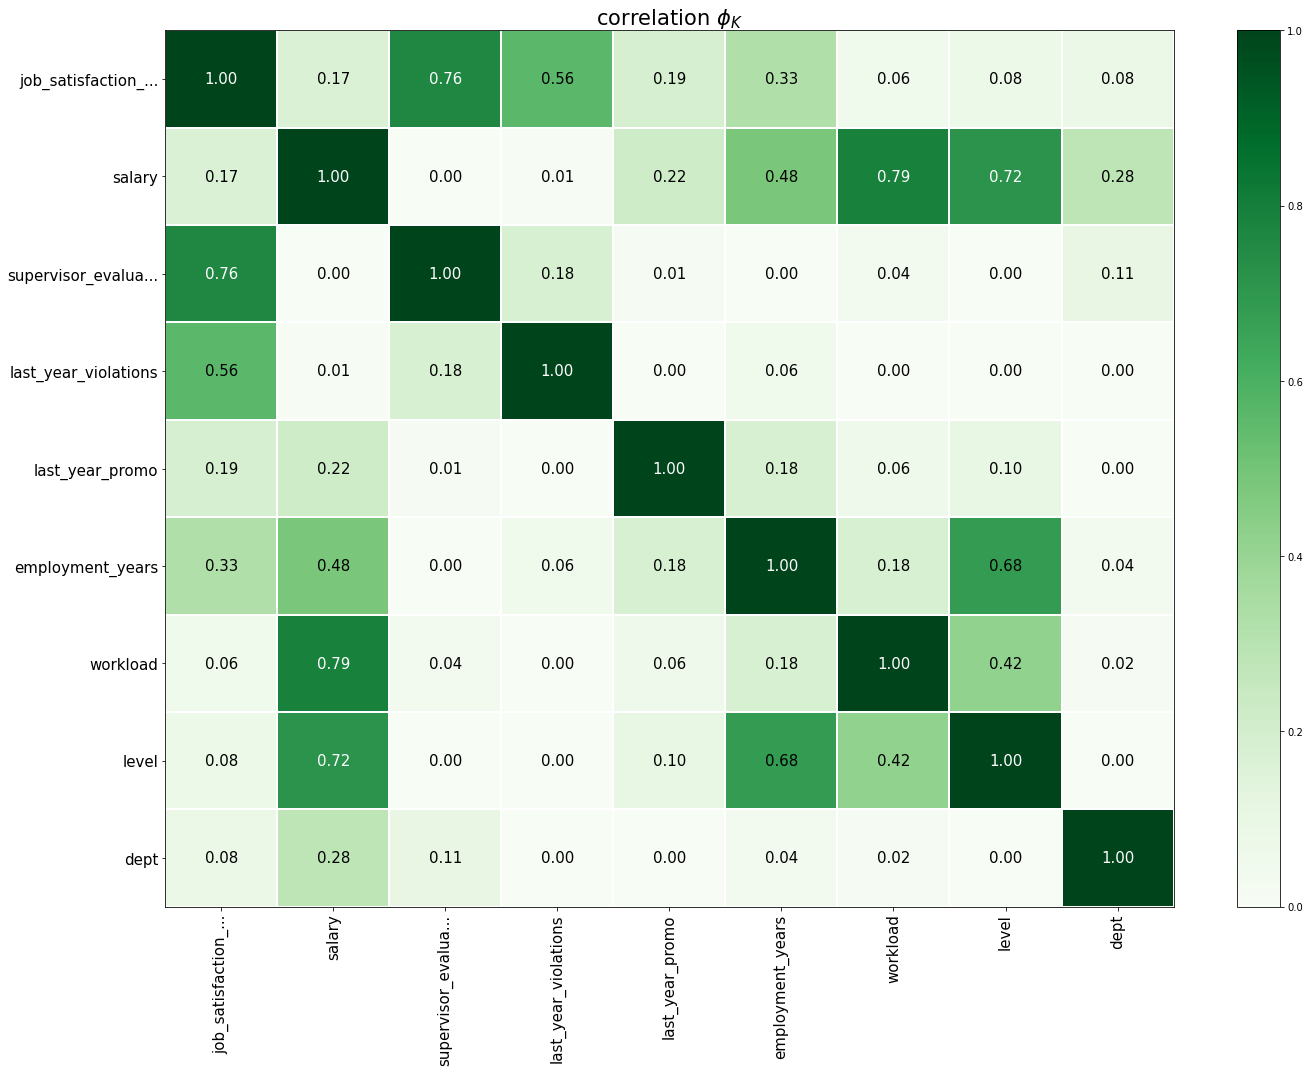

In [37]:
phik_overview = data.drop('id', axis = 1).phik_matrix()

plot_correlation_matrix(
  phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)  

кажется все хорошо, но есть сильная корреляция между зарплатой и загруженностью (вопрос является ли это мультиколлинеарностью...)

In [38]:
data

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [39]:
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))

In [40]:
smape_score = make_scorer(smape, greater_is_better=False)

In [41]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = data.drop(['job_satisfaction_rate', 'id'], axis = 1).select_dtypes(include = np.number).columns.to_list()

In [42]:
RANDOM_STATE = 42

X_train = data.drop(['job_satisfaction_rate', 'id'], axis = 1)
y_train = data['job_satisfaction_rate']


In [43]:
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop = 'first', handle_unknown = 'error', sparse = False)
        )
    ]
)

ord_pipe = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(categories = [['junior', 'middle', 'sinior'], 
                                         ['low', 'medium', 'high']
                                        ],
                           handle_unknown="use_encoded_value", 
                           unknown_value = np.nan)
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state = RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state = RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__min_samples_leaf': range(2, 10),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    n_jobs = -1,
    scoring = smape_score,
    random_state = RANDOM_STATE
)

randomized_search.fit(X_train, y_train);

In [44]:
best_model = randomized_search.best_estimator_
randomized_search.best_params_

{'preprocessor__num': MinMaxScaler(),
 'models__min_samples_split': 8,
 'models__min_samples_leaf': 6,
 'models__max_depth': 9,
 'models': DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=8,
                       random_state=42)}

лучшей моделью оказалось дерево решений с параметрами max_depth=8, min_samples_leaf=6, min_samples_split=9, посмотрим на ее результаты

In [45]:
randomized_search.best_score_ * (-1)

16.13244749359763

Значение метрики smape для нашей модели на тренировочной выборке получилось 16, посмотрим на значение на тестовых данных

In [46]:
pred = randomized_search.best_estimator_.predict(X_test)
smape(y_test, pred)

14.994216760492215

Значение метрики на тестовых данных увеличилось, значит модель работает хорошо, посмотрим на работу других моделей с другими гиперпараметрами и сделаем выводы

In [47]:
pd.DataFrame(randomized_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_split,param_models__min_samples_leaf,param_models__max_depth,param_models,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.017517,0.000383,0.007206,0.000267,MinMaxScaler(),8,6,9,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': MinMaxScaler(), 'models_...",-16.450746,-15.852729,-16.007975,-16.635594,-15.715193,-16.132447,0.352791,1
9,0.014614,0.000426,0.005930,0.000164,passthrough,6,5,8,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': 'passthrough', 'models__...",-16.958574,-16.182069,-16.732749,-16.469868,-16.723898,-16.613431,0.265423,2
3,0.017127,0.000208,0.007287,0.000281,MinMaxScaler(),9,7,8,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': MinMaxScaler(), 'models_...",-17.242389,-16.096255,-16.672103,-16.914033,-16.500110,-16.684978,0.385774,3
4,0.014374,0.000180,0.005831,0.000157,passthrough,2,9,7,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': 'passthrough', 'models__...",-18.055301,-16.749391,-17.506413,-17.880749,-17.379917,-17.514354,0.453910,4
6,0.017421,0.000498,0.007246,0.000234,StandardScaler(),6,5,7,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': StandardScaler(), 'model...",-17.697805,-16.895803,-17.812433,-17.937054,-17.286353,-17.525890,0.383433,5
0,0.016942,0.000387,0.007063,0.000047,MinMaxScaler(),9,8,7,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': MinMaxScaler(), 'models_...",-18.059047,-16.671575,-17.646238,-18.004300,-17.345912,-17.545414,0.507534,6
5,0.020324,0.002587,0.008776,0.001811,StandardScaler(),7,7,7,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': StandardScaler(), 'model...",-17.950545,-16.812021,-17.636196,-18.011383,-17.323231,-17.546675,0.441978,7
2,0.013728,0.000285,0.005756,0.000173,passthrough,8,5,6,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': 'passthrough', 'models__...",-19.228719,-18.172056,-19.061119,-18.900056,-17.810132,-18.634416,0.547550,8
8,0.016771,0.002246,0.007001,0.000237,MinMaxScaler(),5,5,4,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': MinMaxScaler(), 'models_...",-21.348331,-21.627685,-21.772860,-21.543329,-20.409089,-21.340259,0.485415,9
7,0.015107,0.000449,0.007061,0.000225,MinMaxScaler(),2,7,2,"DecisionTreeRegressor(max_depth=9, min_samples...","{'preprocessor__num': MinMaxScaler(), 'models_...",-24.406881,-24.556504,-23.604857,-23.679547,-21.835983,-23.616754,0.967746,10


видно что результаты разными и лучшим и правда оказалось дерево решение и оно c даже независимо от гиперпараметров показывает результат лучше линейной регрессии

Вывод:

была обучены и протестированы Дерево решений и линейная регрессия, дерево решений во всех тестах с разными гиперпараметрами показало себя лучше, самый лучший результат был получен с: max_depth=9, min_samples_leaf=6, min_samples_split=8.

Возможно дерево решений показывает более хороший результат, как раз таки из за различных вариаций гиперпараметров, чем не может похвастаться линейная регрессия

## Задача 2: предсказание увольнения сотрудника из компании

In [48]:
data_train = pd.read_csv('/datasets/train_quit.csv')
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv')
X_test_2 = pd.read_csv('/datasets/test_features.csv')

In [49]:
test = X_test_2.merge(y_test_2, on = 'id')

In [50]:
y_test_2 = test[['id', 'quit']]
X_test_2 = test.drop('quit', axis = 1)

In [51]:
y_test_2

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no
...,...,...
1995,393147,yes
1996,109582,yes
1997,305653,yes
1998,160233,no


In [52]:
X_test_2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [53]:
y_train_2 = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [54]:
data_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [55]:
y_test_2.head()

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no


In [56]:
X_test_2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


все выглядит нормально подробнее посмотрим на предобработке








### Предобработка данных

#### предобработка data_train

In [57]:
data_train

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [59]:
data_train.duplicated().sum()

0

In [60]:
lst = data_train.select_dtypes(exclude = np.number).columns

for i in lst:
    print(data_train[i].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
['no' 'yes']
['no' 'yes']
['no' 'yes']


всё в порядке

### Предобрабокта X_test и y_test

In [61]:
X_test_2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [62]:
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 156.2+ KB


In [63]:
X_test_2 = X_test_2.fillna(X_test.mode().iloc[0])

In [64]:
lst = X_test_2.select_dtypes(exclude = np.number).columns

for i in lst:
    print(X_test_2[i].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' ' ']
['junior' 'middle' 'sinior']
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']


In [65]:
X_test_2[(X_test_2['dept'] == ' ') | (X_test_2['workload'] == ' ')]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800
1699,822186,,middle,medium,3,no,no,4,38400


In [66]:
X_test_2 = X_test_2[(X_test_2['dept'] != ' ') & (X_test_2['workload'] != ' ')]

In [67]:
X_test_2.duplicated().sum()

0

Вывод:

Данные приведены в порядок, где необходимо нули заменены на моду, а также убраны неявные дубликаты, можно переходить к Исследовательскому анализу данных

### Исследовательский анализ данных

In [68]:
data_train

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


проверим отличие между сотрудниками, которые уволились и котоыре остались

In [69]:
y_test_2

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no
...,...,...
1995,393147,yes
1996,109582,yes
1997,305653,yes
1998,160233,no


In [70]:
good_guys = data_train[data_train['quit'] == 'no']
bad_guys = data_train[data_train['quit'] == 'yes']

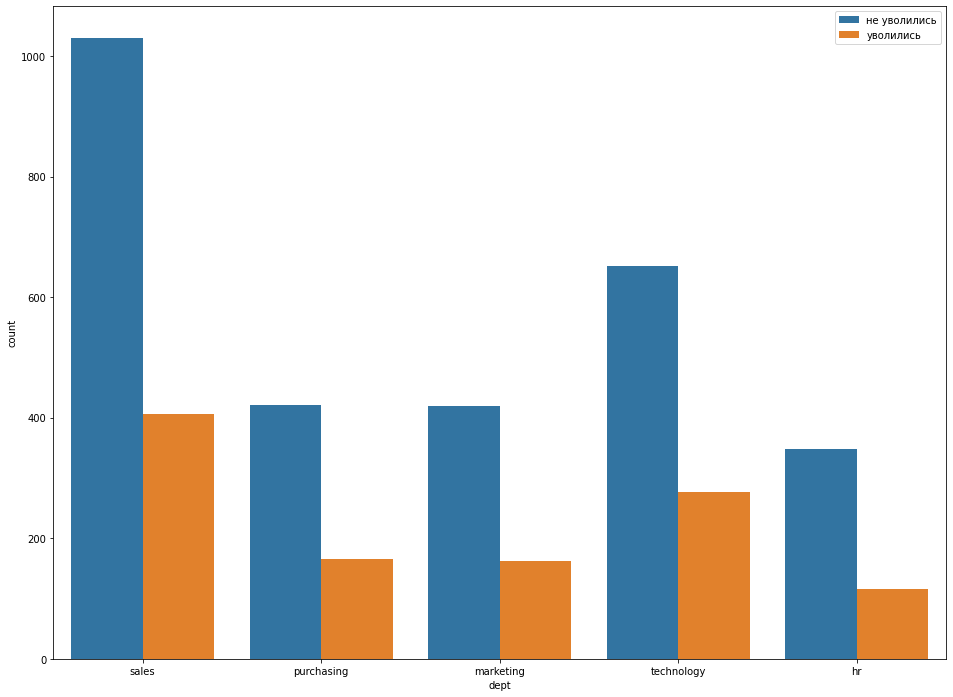

In [71]:
plt.figure(figsize = (16, 12))
sns.countplot(data = data_train, x =  data_train['dept'], hue = 'quit')
plt.legend(['не уволились', 'уволились'])

больше всего увольнений в отделе продаж но это из-за того, что в нем больше всего сотрудников, посмотрим в процентом соотношении

In [98]:
data_train[data_train['quit'] == 'yes'].groupby('dept').count()['quit'] / data_train[data_train['quit'] == 'no'].groupby('dept').count()['quit']

dept
hr            0.333333
marketing     0.389021
purchasing    0.393365
sales         0.394762
technology    0.423313
Name: quit, dtype: float64

чаще всего увольняются из отдела технологий

видно, что больше всего процент увольнений в отделе маркетинга и закупок

In [ ]:
plt.figure(figsize = (16, 12))
sns.countplot(data = data_train, x = 'level', hue = 'quit')
plt.legend(['не уволились', 'уволились'])

сотрудники грейда junior, увольняются чаще чем остаются 

In [ ]:
plt.figure(figsize = (16, 12))
sns.countplot(data = data_train, x = 'workload', hue = 'quit')
plt.legend(['не уволились', 'уволились'])

удивительно, но сотрудинки с маленькой занятостью увольняются чаще

In [ ]:
plt.figure(figsize = (16, 12))
sns.countplot(data = data_train, x = 'last_year_promo', hue = 'quit')
plt.legend(['не уволились', 'уволились'])

ожидаемо, те кому не дают премию вообще не увольняются 

In [ ]:
plt.figure(figsize = (16, 12))
sns.countplot(data = data_train, x = 'last_year_violations', hue = 'quit')
plt.legend(['не уволились', 'уволились'])

большой процент людей увольняется после повышения

In [ ]:
plt.figure(figsize = (16, 12))
plt.hist(good_guys['employment_years'])
plt.hist(bad_guys['employment_years'])
plt.legend(['не уволились', 'уволились'])

чем меньше стаж тем больше людей вольняется

In [ ]:
plt.figure(figsize = (16, 12))
plt.hist(good_guys['salary'])
plt.hist(bad_guys['salary'])
plt.legend(['не уволились', 'уволились'])

сотрудники с зарплатой меньше 20000 уволняются очень часто

In [ ]:
plt.figure(figsize = (16, 12))
plt.hist(good_guys['supervisor_evaluation'])
plt.hist(bad_guys['supervisor_evaluation'])
plt.legend(['не уволились', 'уволились'])

те у кого оценка работы меньше чем 4 балла, скорее всего будут уволены

вывод: 

видно, что больше всего увольняются сотрудники с уровнем должности junior, с рабочей нагрузкой low, имеющие низкие оценки руководителя < 3, недавно работающие в компании и работники отдела технологий

Проверим как влияет уровень удовлетворённости сотрудника работой в компании на то уволится сотрудник или нет

In [ ]:
data_t = y_train_2.merge(y_test_2, on = 'id')

In [ ]:
phik_overview = data_t.drop('id', axis = 1).phik_matrix()

plot_correlation_matrix(
  phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)  

видно, что удовлетворенность сотрудинка сильно влияет, нужно добавить его в признаки для обучения

In [ ]:
X_test_2['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
data_train['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(data_train.drop(['quit', 'id'], axis=1))

#### Подготовка данных

In [ ]:
data_train = data_train.drop('id', axis = 1)

In [ ]:
X_train_2 = data_train.drop(['quit'], axis=1)
y_train_2 = data_train['quit']

In [ ]:
y_test_2 = y_test_2[y_test_2['id'].isin(X_test_2['id'])]

In [ ]:
le = LabelEncoder()
y_train_2 = le.fit_transform(y_train_2)
y_test_2 = le.transform(y_test_2.drop('id', axis = 1))

In [ ]:
ohe_columns = [
    'last_year_violations', 
    'last_year_promo', 
    'dept'
]
ord_columns = [
    'level', 
    'workload' 
]
num_columns = ['salary', 'employment_years', 'supervisor_evaluation', 'job_satisfaction_rate'] 

In [ ]:
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop = 'first', handle_unknown = 'error', sparse = False)
        )
    ]
)

ord_pipe = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(categories = [['junior', 'middle', 'sinior'], 
                                         ['low', 'medium', 'high']
                                        ],
                           handle_unknown="use_encoded_value", 
                           unknown_value = np.nan)
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state = RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(probability= True, random_state = RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    n_jobs = -1,
    scoring = 'roc_auc',
    random_state = RANDOM_STATE
)

randomized_search.fit(X_train_2, y_train_2);

In [ ]:
randomized_search.best_estimator_

лучшая модель - DecisionTreeClassifier(max_depth=5, min_samples_leaf=9), посмотрим какое значение метрики рок аук мы получили на тренировочных и тестовых данных

In [ ]:
randomized_search.best_score_

0.93 на тренировочной

In [ ]:
pred = randomized_search.best_estimator_.predict(X_test_2.drop('id', axis = 1))

In [ ]:
y_test_proba = randomized_search.predict_proba(X_test_2.drop('id', axis = 1))[:,1]

In [ ]:
roc_auc = roc_auc_score(y_test_2, y_test_proba)

In [ ]:
roc_auc

0.91 на тестовой

Вывод:

и снова дерево решений показало лучший результат, вероятно это сново связано с гибкостью гиперпараметров модели

### Вывод

В ходе работы были проделаны следующие шаги:

1) Были получены данные, некоторые из которых содержали пропуски и дубликаты, пропуски были заполнены модой, дубликаты удалены

2) После того как данные были приведены в порядок, был проведен исследовательский анализ данных, благодаря которому выяснилось, что в данных не присутствует аномалий или же выбросов

3) Данные были подготовлены к обучению модели с помощью нескольких методов кодирования и нескольких методом масштабироваиня

4) для первой задачи были обучены модели: дерево решений и линейная регрессия, для второй задачи: дерево решений, SVC и KNn

5) в ходе перебора нескольких видов масштабирования, кодировщиков, моделей и их гиперпараметров, лучшей моделью оказалось дерево решений на обоих этапах задачи

6) был сделан портрет сотрудника, который уволится: новый сотрудник компании, позиция junior, низкая загрузка и оценка работодателя меньше 3

можно выделить некоторые советы для удержания сотрудников

1) новые сотрудники компании чаще всего увольняются, что является вполне естественным, возможно стоит обратить внимание на взаимоотношения в коллективе, вероятно новичков встречают не очень тепло

2) когда у людей мало нагрузки на их рабочем месте они увольняются, возможно, люди скучают и им стоит давать больше работы 

3) также люди с зарплатой меньше 20000, с очень большой вероятностью уволятся, возможно стоит немного увеличить начальную зарплату, чтобы удержать хоть кого-нибудь

4) также возможно стоит сделать систему оценивания сотрудников менее строгую, ведь люди с оценкой 3 с большой вероятностью уволятся

на данных были обучены некотомодели машинного обучения, лучшей моделью оказалось дерево решений, благодаря своим гибким гиперпараметрам